In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
historic_trade=pd.read_csv("https://drive.google.com/uc?export=download&id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs")
historic_trade.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [3]:
print(historic_trade.shape)

(211224, 16)


In [4]:
print(historic_trade.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [5]:
print(historic_trade.isnull().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [6]:
#removing columns not relevant for analysis
historic_trade=historic_trade.drop(['Transaction Hash','Order ID','Timestamp'],axis=1)
historic_trade.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,Trade ID
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,True,0.345404,8.950000e+14
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,True,0.005600,4.430000e+14
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,True,0.050431,6.600000e+14
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,True,0.050043,1.080000e+15
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,True,0.003055,1.050000e+15


In [7]:
historic_trade['Timestamp IST']=pd.to_datetime(historic_trade['Timestamp IST'], format="%d-%m-%Y %H:%M")

In [8]:
historic_trade['Date']=historic_trade['Timestamp IST'].dt.date


In [9]:
#Removing Timestamp IST column
historic_trade=historic_trade.drop(columns=['Timestamp IST'])

In [10]:
historic_trade.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,Trade ID,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,True,0.345404,8.950000e+14,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,True,0.005600,4.430000e+14,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,True,0.050431,6.600000e+14,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,True,0.050043,1.080000e+15,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,True,0.003055,1.050000e+15,2024-12-02


In [11]:
historic_trade=historic_trade.drop_duplicates(subset=['Trade ID'])

In [12]:
historic_trade.shape

(2810, 13)

In [13]:
bitcoin_sentiment=pd.read_csv("https://drive.google.com/uc?export=download&id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf")
bitcoin_sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [14]:
print(bitcoin_sentiment.shape)

(2644, 4)


In [15]:
print(bitcoin_sentiment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None


In [16]:
print(bitcoin_sentiment.isnull().sum())

timestamp         0
value             0
classification    0
date              0
dtype: int64


In [17]:
#removing Timestamp column
bitcoin_sentiment=bitcoin_sentiment.drop(columns=['timestamp'])
bitcoin_sentiment.head()

,value,classification,date
0,30,Fear,2018-02-01
1,15,Extreme Fear,2018-02-02
2,40,Fear,2018-02-03
3,24,Extreme Fear,2018-02-04
4,11,Extreme Fear,2018-02-05


In [18]:
bitcoin_sentiment['date']=pd.to_datetime(bitcoin_sentiment['date']).dt.date

In [19]:
#renaming columns
bitcoin_sentiment.rename(columns={'date':'Date','value':'Sentiment score'},inplace=True)
bitcoin_sentiment.head()

,Sentiment score,classification,Date
0,30,Fear,2018-02-01
1,15,Extreme Fear,2018-02-02
2,40,Fear,2018-02-03
3,24,Extreme Fear,2018-02-04
4,11,Extreme Fear,2018-02-05


In [20]:
merged_df=pd.merge(historic_trade,bitcoin_sentiment,on='Date',how='left')
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,Trade ID,Date,Sentiment score,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,True,0.345404,8.950000e+14,2024-12-02,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,True,0.005600,4.430000e+14,2024-12-02,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,True,0.050431,6.600000e+14,2024-12-02,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,True,0.050043,1.080000e+15,2024-12-02,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,True,0.003055,1.050000e+15,2024-12-02,80.0,Extreme Greed


In [21]:
merged_df.shape

(2810, 15)

In [22]:
merged_df['NetPnL']=merged_df['Closed PnL']-merged_df['Fee']
merged_df['Profitable']=merged_df['NetPnL']>0

In [23]:
merged_df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Fee,Trade ID,Sentiment score,NetPnL
count,2810.000000,2.810000e+03,2.810000e+03,2.810000e+03,2810.000000,2810.000000,2.810000e+03,2807.000000,2810.000000
mean,19014.095301,6.774578e+03,1.000178e+04,9.648219e+03,120.639594,1.970259,2.004266e+14,53.047382,118.669334
std,35839.894869,1.102600e+05,4.554895e+04,3.571030e+05,2466.928827,9.446748,2.916178e+14,20.152843,2465.445133
min,0.000848,1.000000e-04,1.000000e-01,-9.309120e+06,-83056.320000,-1.042776,0.000000e+00,10.000000,-83128.358400
25%,4.418850,8.138000e-01,2.407200e+02,-5.157500e+02,0.000000,0.016577,6.462500e+12,38.000000,-0.312039
50%,22.390000,2.500000e+01,9.997000e+02,2.665731e+01,0.000000,0.121000,5.085000e+13,51.000000,-0.010225
75%,2678.900000,1.985650e+02,3.741095e+03,6.084553e+03,10.344098,0.660944,3.107500e+14,72.000000,9.903600
max,108261.000000,3.955758e+06,1.074632e+06,2.365002e+06,78682.720320,274.979241,1.130000e+15,94.000000,78665.692335


In [24]:
#Daily trader performance
daily_summary=merged_df.groupby(['Date','classification']).agg({
    'NetPnL': ['mean', 'sum'],
    'Size USD': 'sum',
    'Profitable': 'mean'}).reset_index()
daily_summary.columns=['Date', 'Classification', 'AvgPnL', 'TotalPnL', 'TotalVolume', 'WinRate']

# Merge daily_summary with bitcoin_sentiment to bring in the 'Sentiment score'
daily_summary = pd.merge(daily_summary, bitcoin_sentiment[['Date', 'Sentiment score']], on='Date', how='left')

daily_summary.head()

,Date,Classification,AvgPnL,TotalPnL,TotalVolume,WinRate,Sentiment score
0,2023-12-17,Greed,-12.531073,-12.531073,8380.22,0.0,73
1,2023-12-30,Greed,26.707710,53.415420,8896.63,0.5,68
2,2024-01-02,Greed,35.044181,35.044181,272.58,1.0,71
3,2024-01-03,Greed,5.607194,11.214388,2328.65,0.5,70
4,2024-01-06,Greed,-65.051870,-130.103741,48541.13,0.5,70


In [38]:
# Save results
daily_summary.to_csv('daily_summary.csv', index=False)
print("Data Saved")


Data Saved


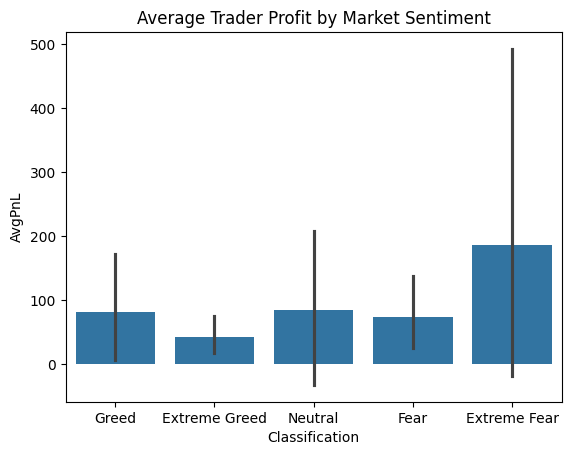

In [26]:
# --- Visualization 1: Avg PnL vs Sentiment ---
sns.barplot(x='Classification', y='AvgPnL', data=daily_summary)
plt.title('Average Trader Profit by Market Sentiment')
plt.show()

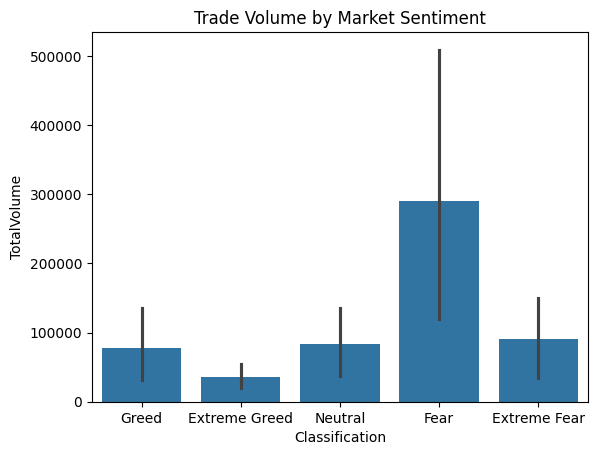

In [27]:
#--- Visualization 2: Volume vs Sentiment ---
sns.barplot(x='Classification', y='TotalVolume', data=daily_summary)
plt.title('Trade Volume by Market Sentiment')
plt.show()


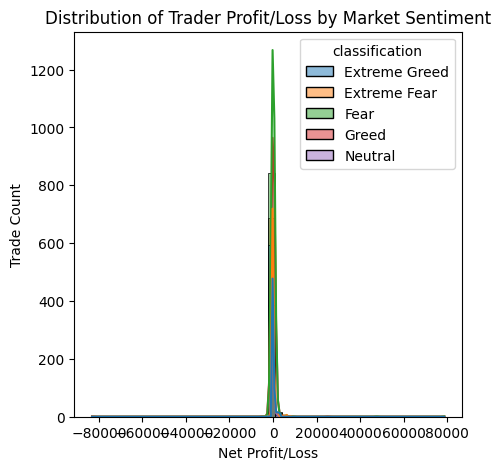

In [28]:
plt.figure(figsize=(5,5))
sns.histplot(data=merged_df, x='NetPnL', hue='classification', kde=True, bins=50)
plt.title('Distribution of Trader Profit/Loss by Market Sentiment')
plt.xlabel('Net Profit/Loss')
plt.ylabel('Trade Count')
plt.show()


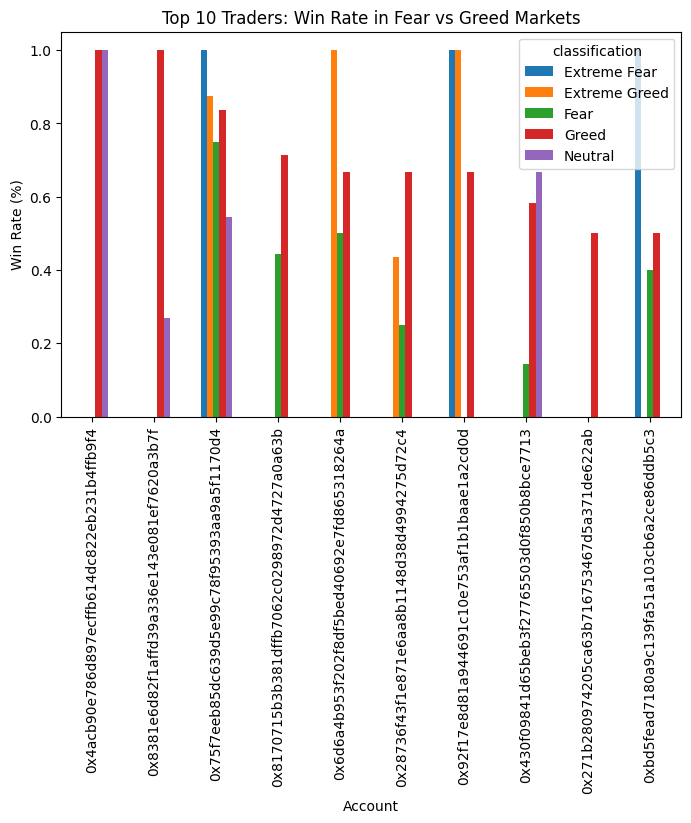

In [30]:
trader_perf = merged_df.groupby(['Account','classification'])['Profitable'].mean().unstack()
trader_perf = trader_perf.fillna(0).sort_values('Greed', ascending=False).head(10)

trader_perf.plot(kind='bar', figsize=(8,5))
plt.title('Top 10 Traders: Win Rate in Fear vs Greed Markets')
plt.ylabel('Win Rate (%)')
plt.show()


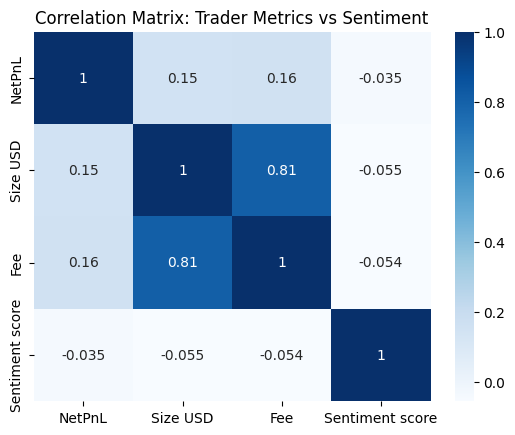

In [31]:
corr = merged_df[['NetPnL', 'Size USD', 'Fee', 'Sentiment score']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix: Trader Metrics vs Sentiment')
plt.show()


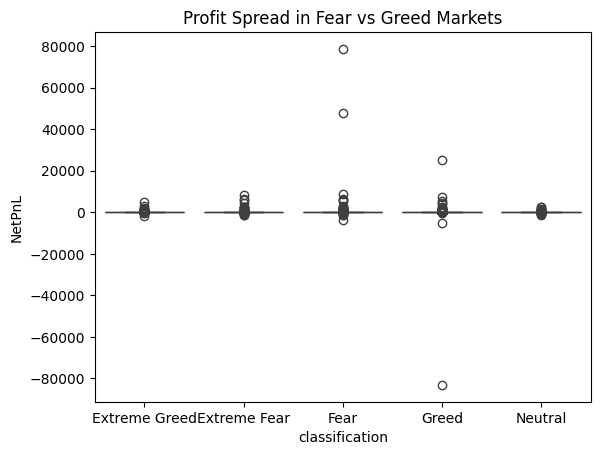

In [32]:
sns.boxplot(x='classification', y='NetPnL', data=merged_df)
plt.title('Profit Spread in Fear vs Greed Markets')
plt.show()


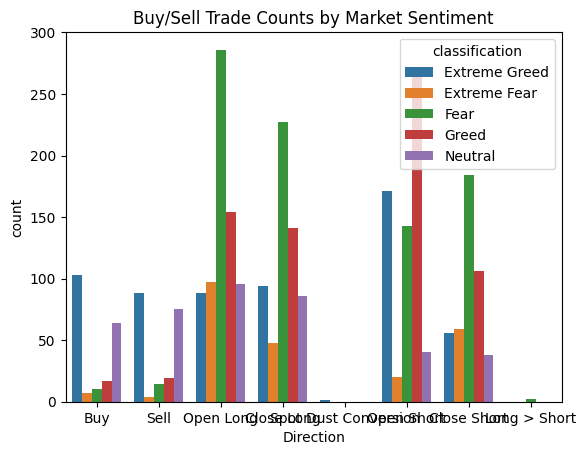

In [34]:
sns.countplot(x='Direction', hue='classification', data=merged_df)
plt.title('Buy/Sell Trade Counts by Market Sentiment')
plt.show()


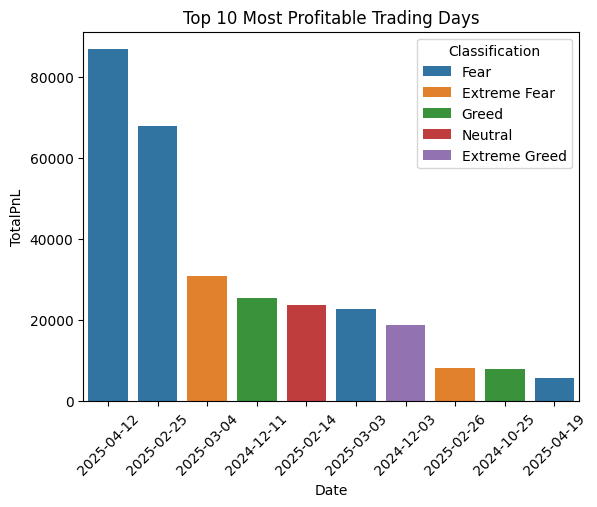

In [35]:
top_days = daily_summary.sort_values('TotalPnL', ascending=False).head(10)
sns.barplot(x='Date', y='TotalPnL', hue='Classification', data=top_days)
plt.title('Top 10 Most Profitable Trading Days')
plt.xticks(rotation=45)
plt.show()
